 # Data Analysis

In [1]:
# Importing Libraries

# To Handle Dataset
import numpy as np
import pandas as pd

# To Plot Graphs
import matplotlib.pyplot as plt
import seaborn as sns

# For the yeo-johnson transformation
import scipy.stats as stats

# To display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# Load the training data

data = pd.read_csv('train.csv')

# Rows and Columns of the data
print(data.shape)

# Visualize the data
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Drop id, just an identifier

data.drop(['Id'], axis=1, inplace=True)

data.shape

(1460, 80)

# Analysis

## Analyze the following:

1. Target Variable
2. Variable Types
3. Missing Data
4. Numerical Variables
5. Cateogrical Variables


# Target

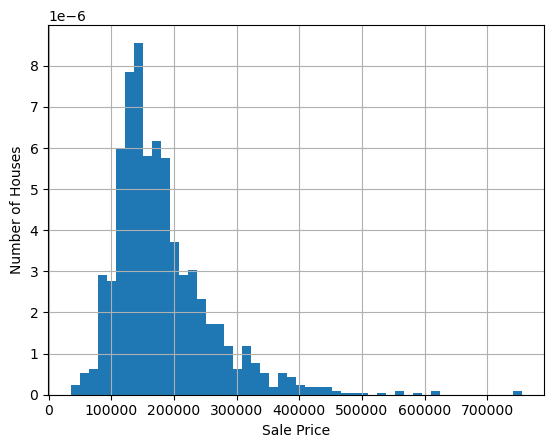

In [5]:
# Histogram to evaluate target distribution

data['SalePrice'].hist(bins=50, density = True)
plt.ylabel('Number of Houses')
plt.xlabel('Sale Price')
plt.show()

Let's transform the target variable

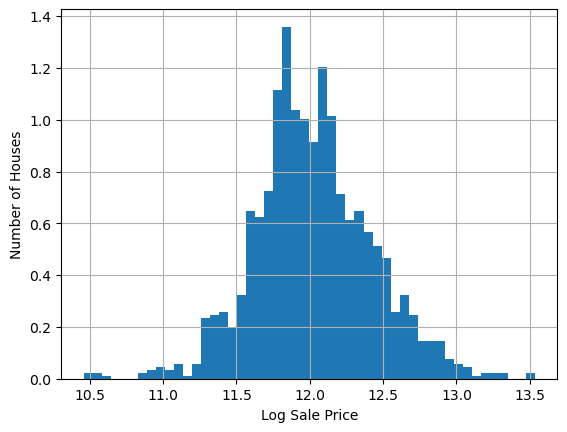

In [6]:
# Logarithmic Transformation

np.log(data['SalePrice']).hist(bins=50, density = True)
plt.ylabel('Number of Houses')
plt.xlabel('Log Sale Price')
plt.show()

# Variable Types

In [8]:
# Identify categorical variables
# Identify them with type *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# There is an additional one MSSubClass

cat_vars = cat_vars + ['MSSubClass']

len(cat_vars)

44

In [9]:
# Cast all variables that are categorical as categorical

data[cat_vars] = data[cat_vars].astype('O')

In [10]:
# Now identify numerical variables

num_vars = [var for var in data.columns if var not in cat_vars and var != 'SalePrice']

len(num_vars)

35

# Missing Values

Let's check if there are any missing values in the dataset

In [11]:
# Make a list of the variables that contain missing values

vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# Determine percentage of missing values
data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

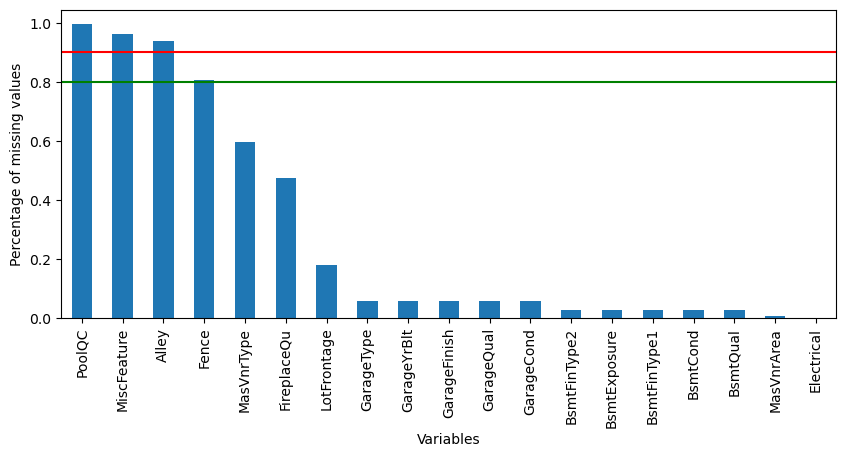

In [12]:
# Plot the percentage of missing values

data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10,4))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.axhline(y=0.90, color='r', linestyle = '-')
plt.axhline(y=0.80, color='g', linestyle = '-')

plt.show()

In [13]:
# Now determine which variables, from those with missing data, are numerical and which are categorical

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  16
Number of numerical variables with na:  3


In [14]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [15]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

# Relationship between missing data and sales price

Let's evaluate the price of house in those observation where data is missing

In [16]:
def analyze_na_value(data, var):
    # Make a copy of the data
    data = data.copy()
    
    # Create a variable that indicates 1 if the observation was missing or 0 otherwise
    data[var] = np.where(data[var].isnull(), 1, 0)
    
    # Calculate the mean and std SalePrice where the information is missing or present
    tmp = data.groupby(var)['SalePrice'].agg(['mean', 'std'])

    tmp.plot(kind = 'barh', y = 'mean', legend = False, xerr = 'std', title = 'Sale Price', color = 'skyblue')
    
    plt.show()

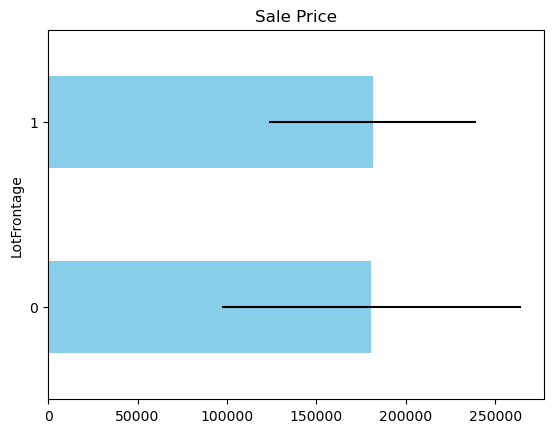

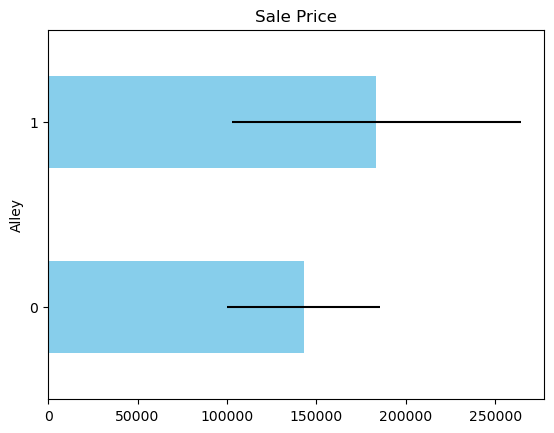

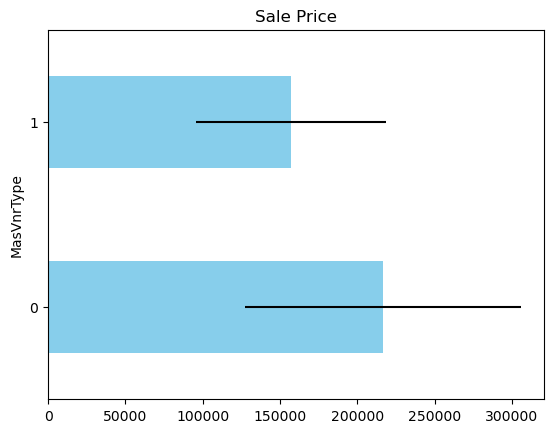

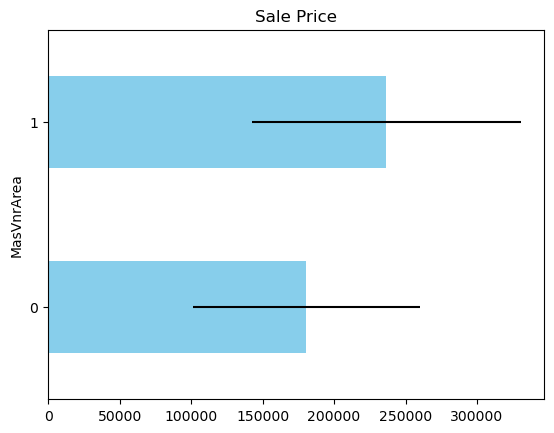

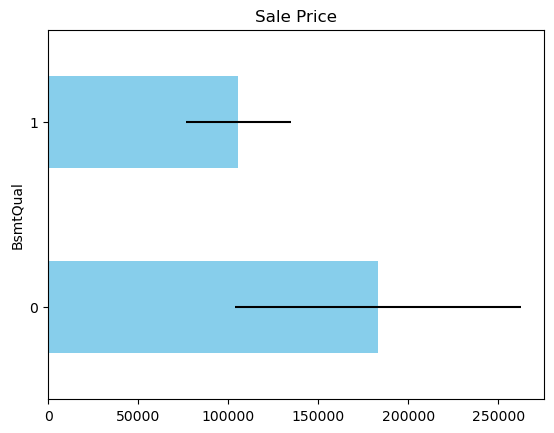

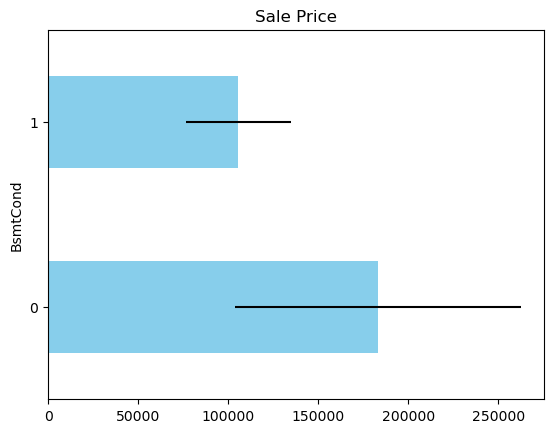

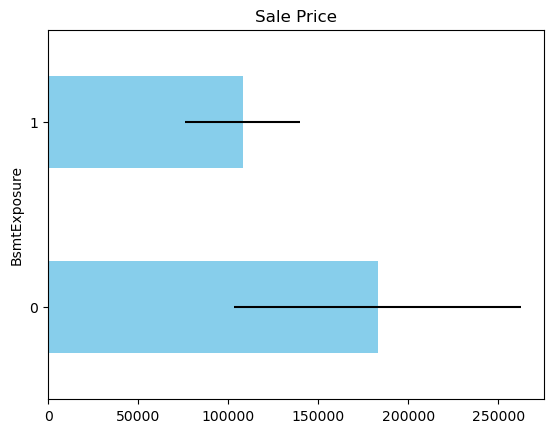

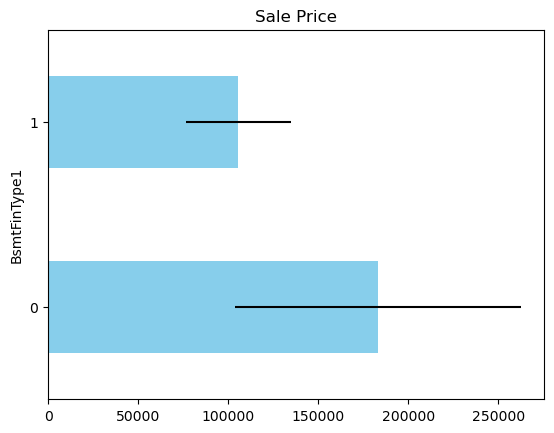

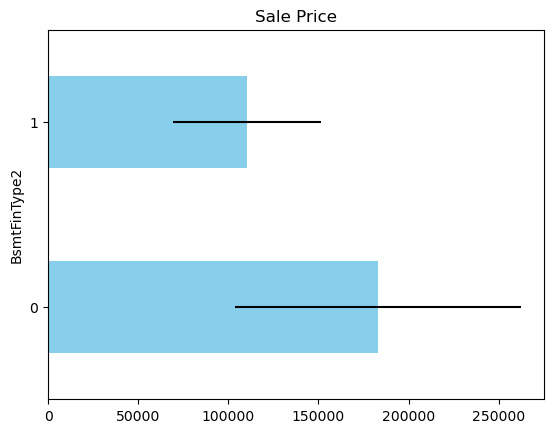

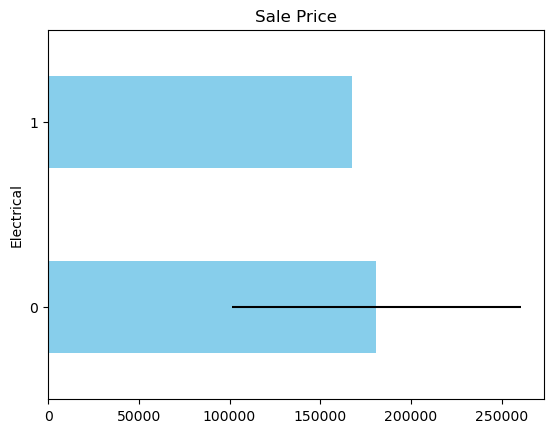

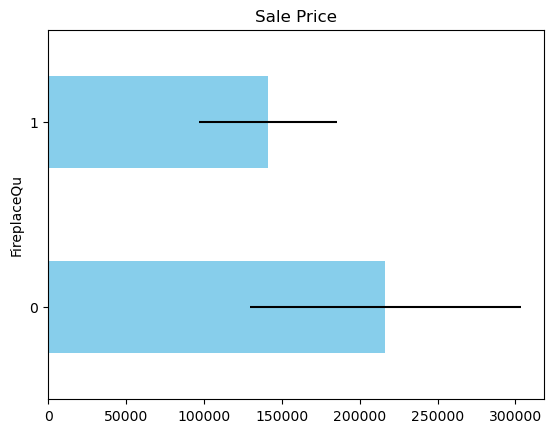

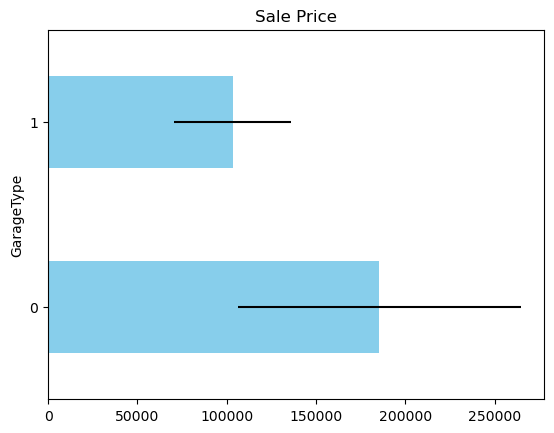

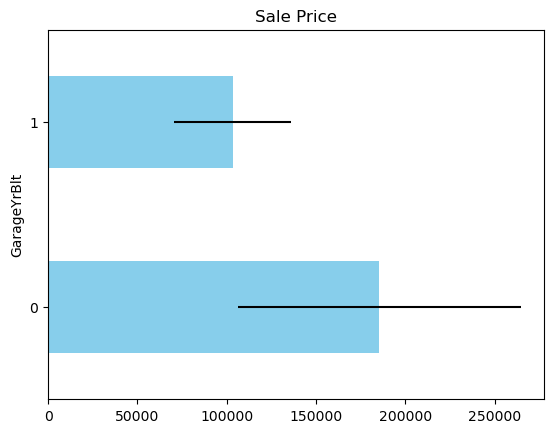

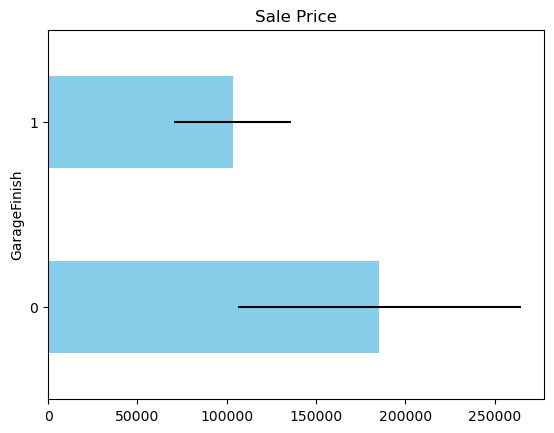

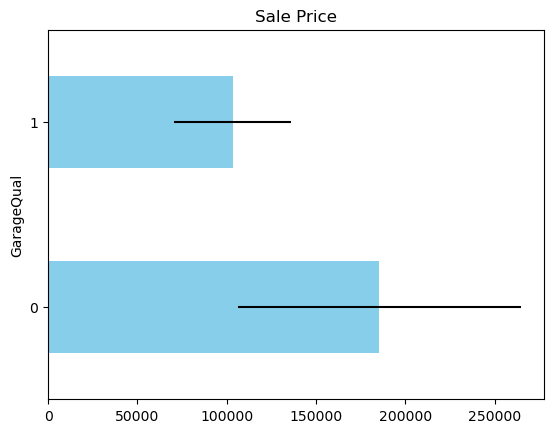

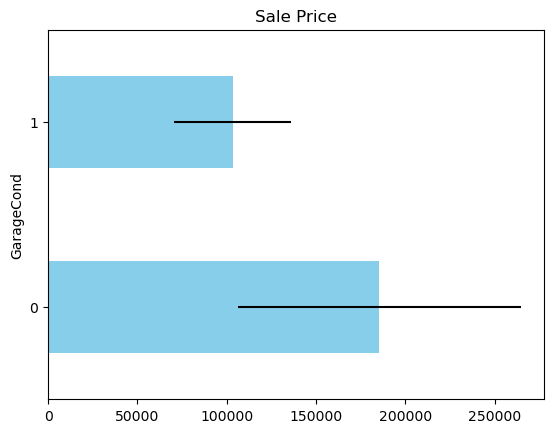

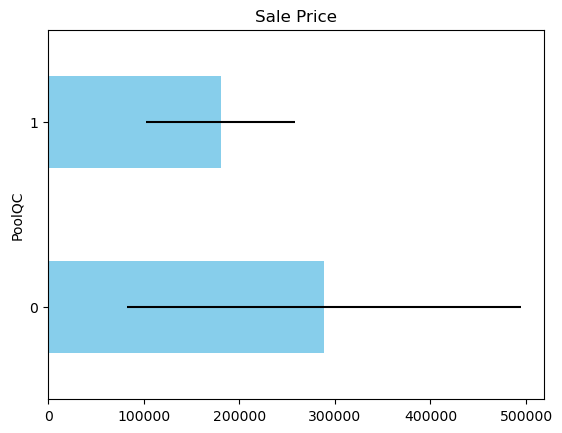

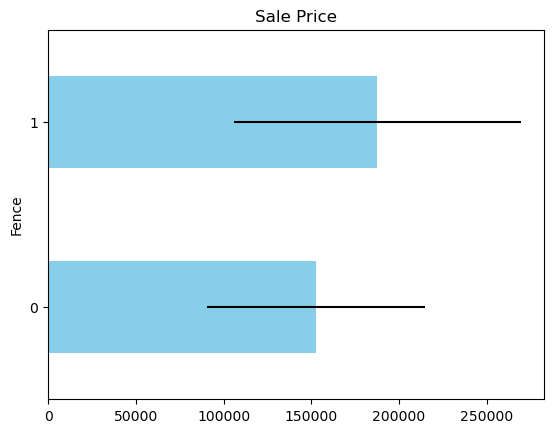

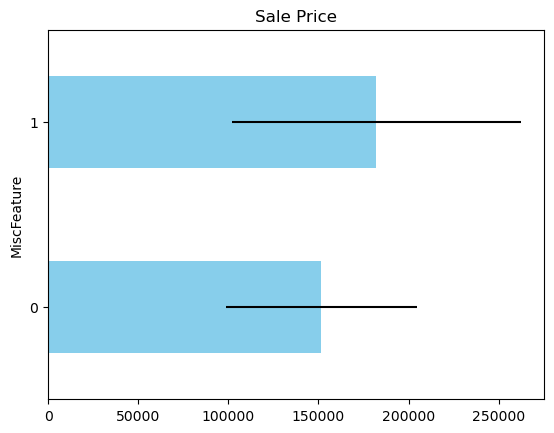

In [17]:
# Let's run the function on each variable with missing data

for vars in vars_with_na:
    analyze_na_value(data, vars)

# Temporal Variables

We have 4 year variables:

- Year Built
- Year RemodAdd
- GarageYrBlt
- YrSold

In [18]:
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [19]:
# Explore values of year variables

for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Text(0, 0.5, 'Median Sale Price')

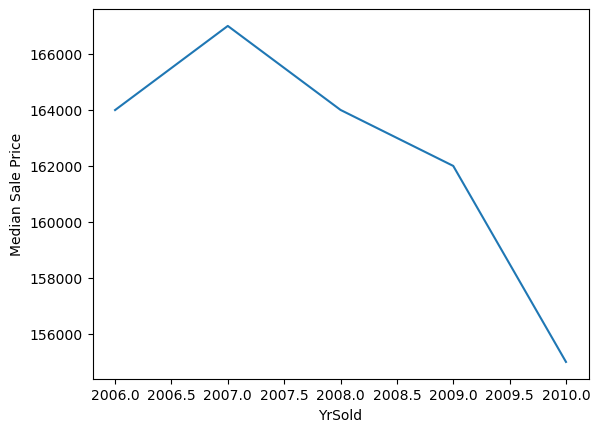

In [20]:
# Explore the evolution of sale price vs year it was sold

data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median Sale Price')

Unusual finding since prices for houses usually rise

Text(0, 0.5, 'Median Sale Price')

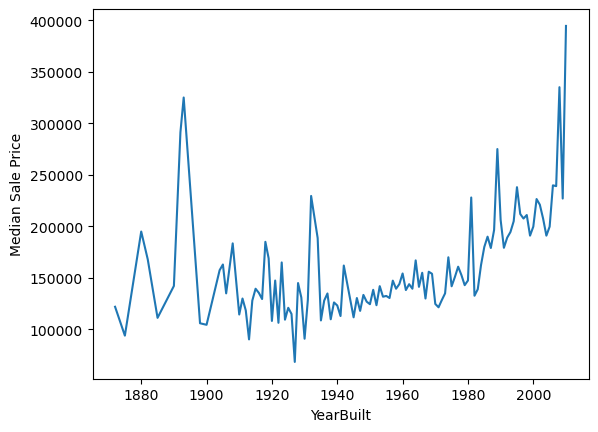

In [21]:
# Let's plot price of sale vs year built

data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median Sale Price')

 Newer houses or younger houses are more expensive.

 Could it be that lately older houses were sold?

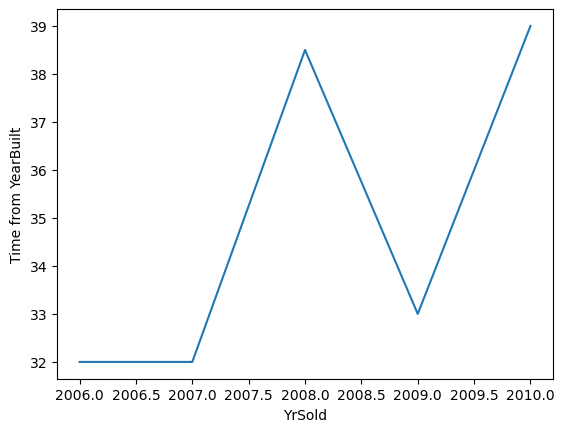

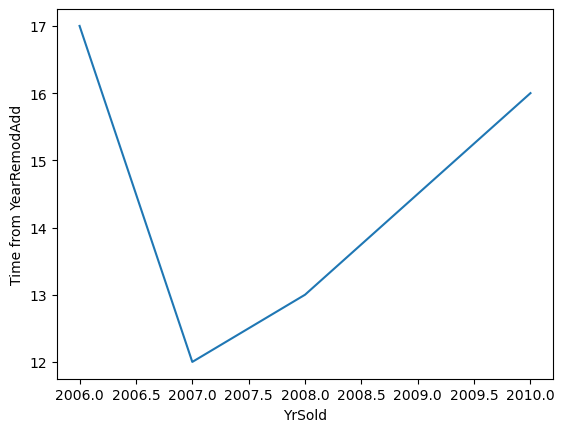

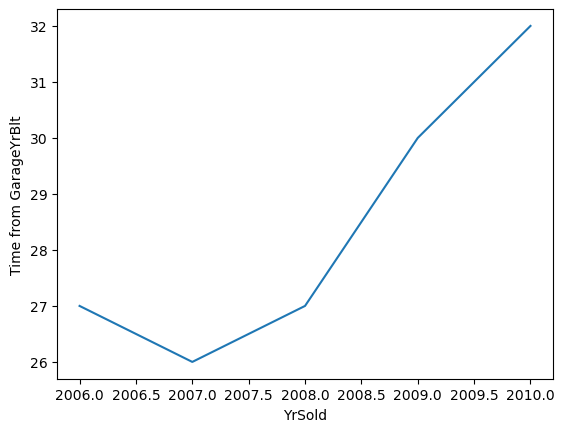

In [22]:
# Lets capture the elapsed years between the year variables and the year in which the house was sold

def analyze_year_vars(df, var):
    df = df.copy()

    #Capture difference between year variable and year sold
    df[var] = df['YrSold'] - df[var]

    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()

for var in year_vars:
    if var != 'YrSold':
        analyze_year_vars(data, var)



From the plots, we see that towards 2010, the houses sold had older garages, had not been remodelled recently, and that might explain cheaper prices.

Now lets plot time since last remodelled, or time since built and sales price

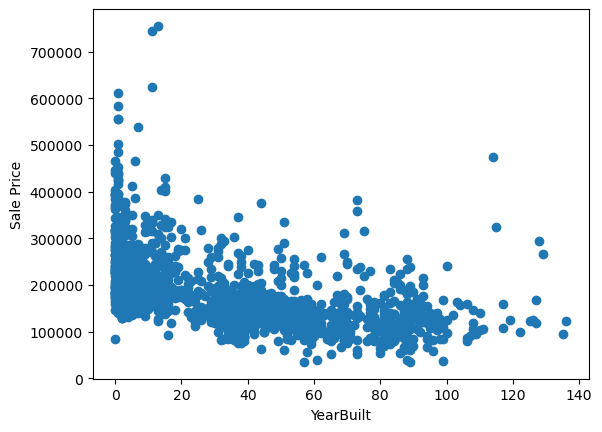

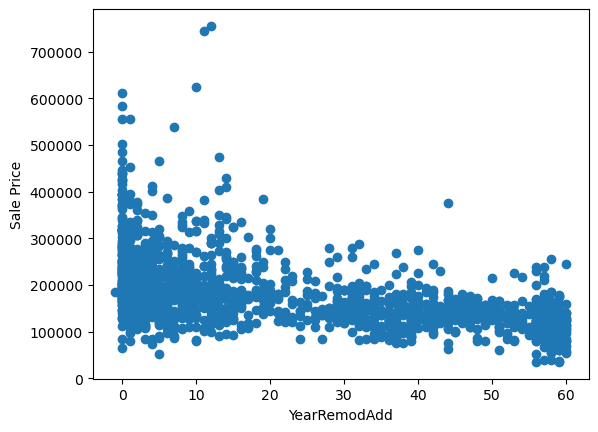

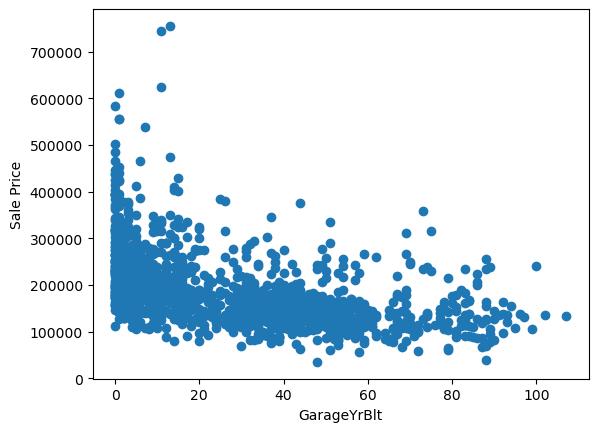

In [24]:
def analyze_year_vars(df, var):
    df = df.copy()

    #Capture difference between year variable and year sold
    df[var] = df['YrSold'] - df[var]

    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('Sale Price')
    plt.xlabel(var)
    plt.show()

for var in year_vars:
    if var != 'YrSold':
        analyze_year_vars(data, var)

# Discrete Variables

In [25]:
# Let's get a list of discrete variables

discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20 and var not in year_vars]
print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


In [26]:
data[discrete_vars].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


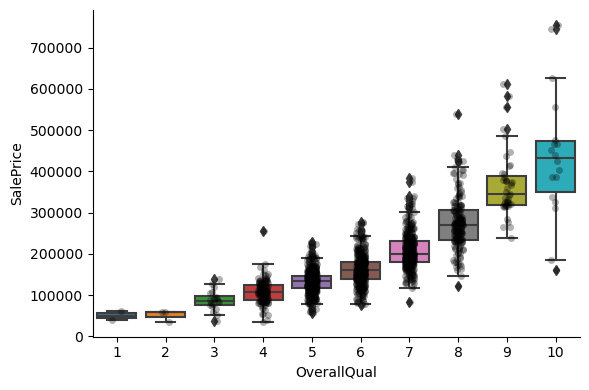

c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


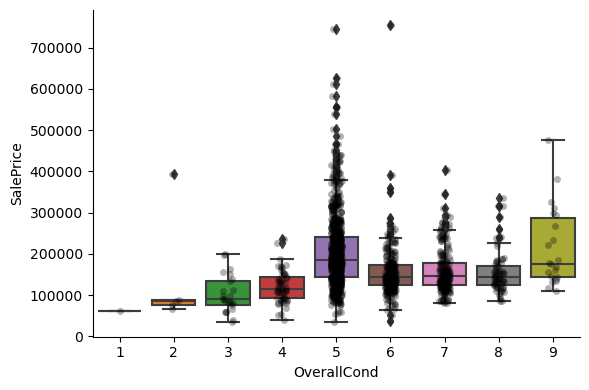

c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


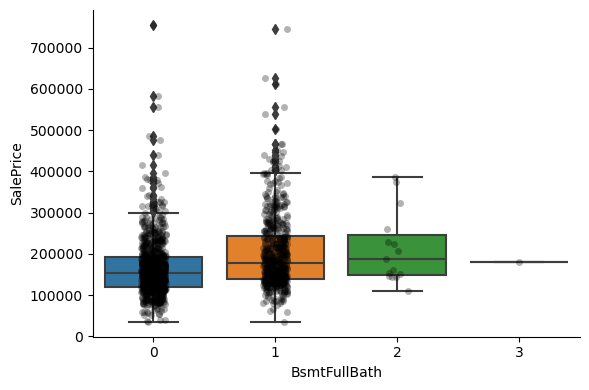

c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


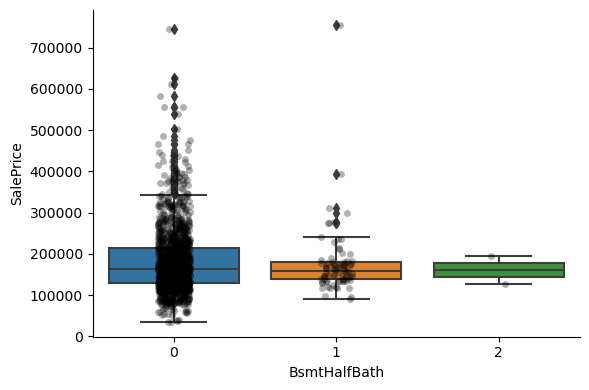

c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


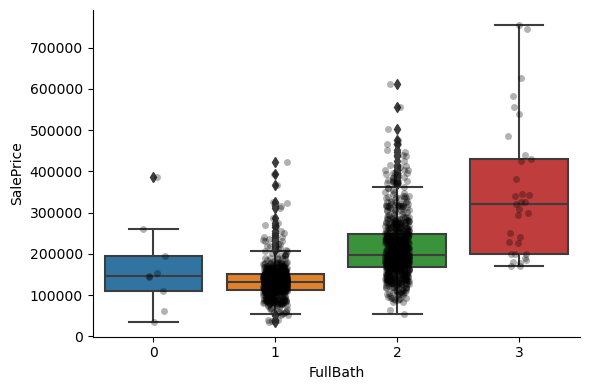

c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


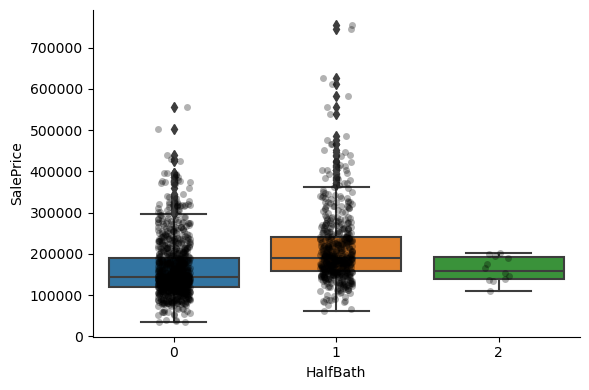

c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


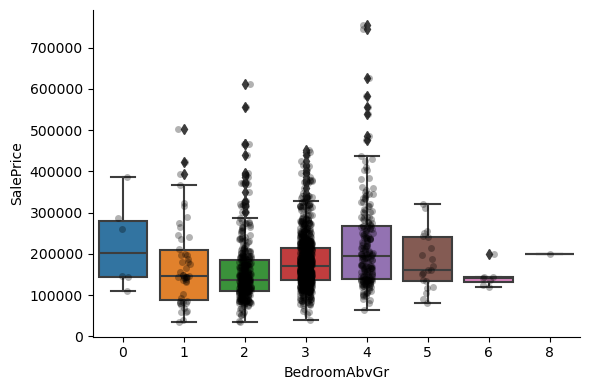

c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


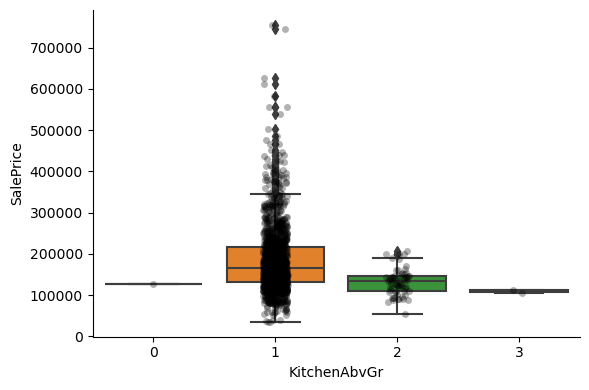

c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


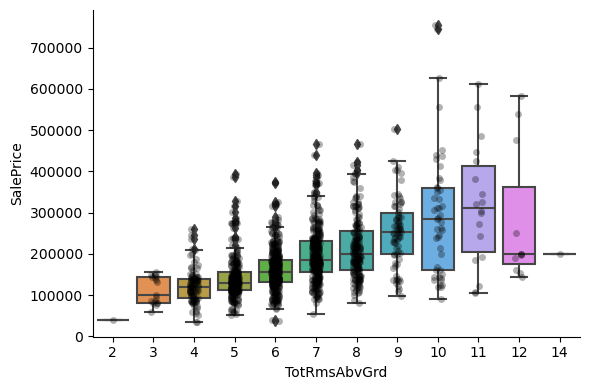

c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


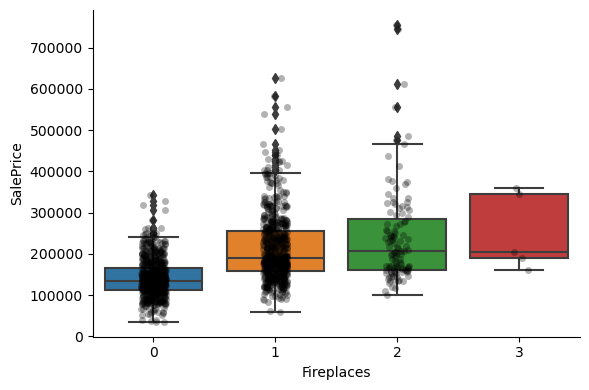

c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


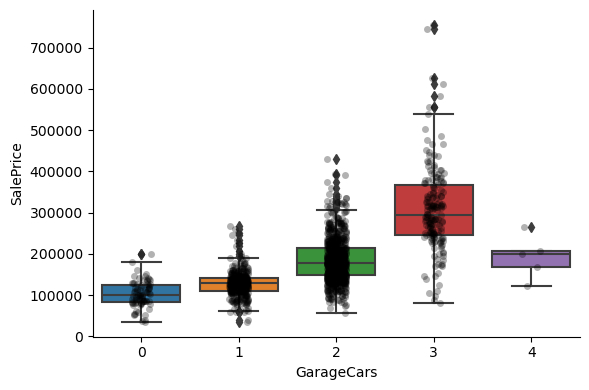

c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


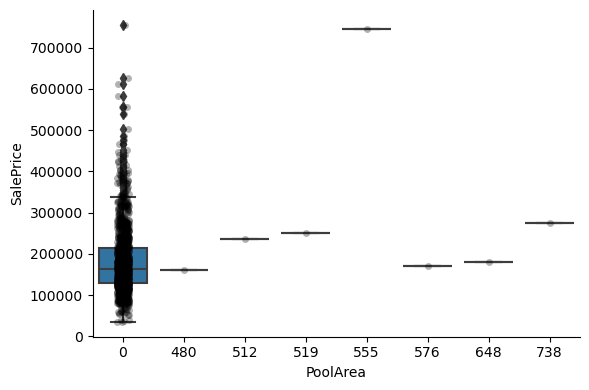

c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d0tam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


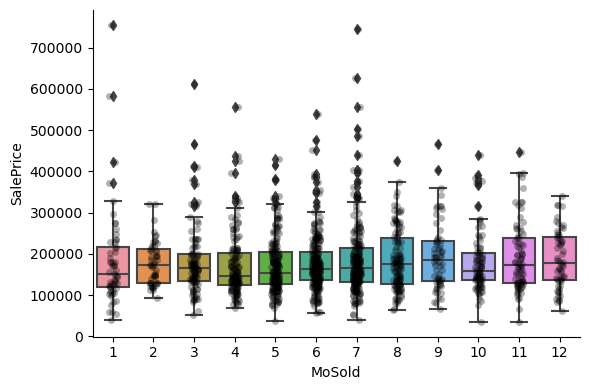

In [27]:
# Plot a catplot 

for var in discrete_vars:
    sns.catplot(x=var, y='SalePrice', data=data, kind='box', height=4, aspect=1.5)
    #Add data points to box plot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, color='k', alpha=0.3)
    plt.show()

# Continuous Variables

In [28]:
# Let's get a list of continuous variables

cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


In [29]:
data[cont_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


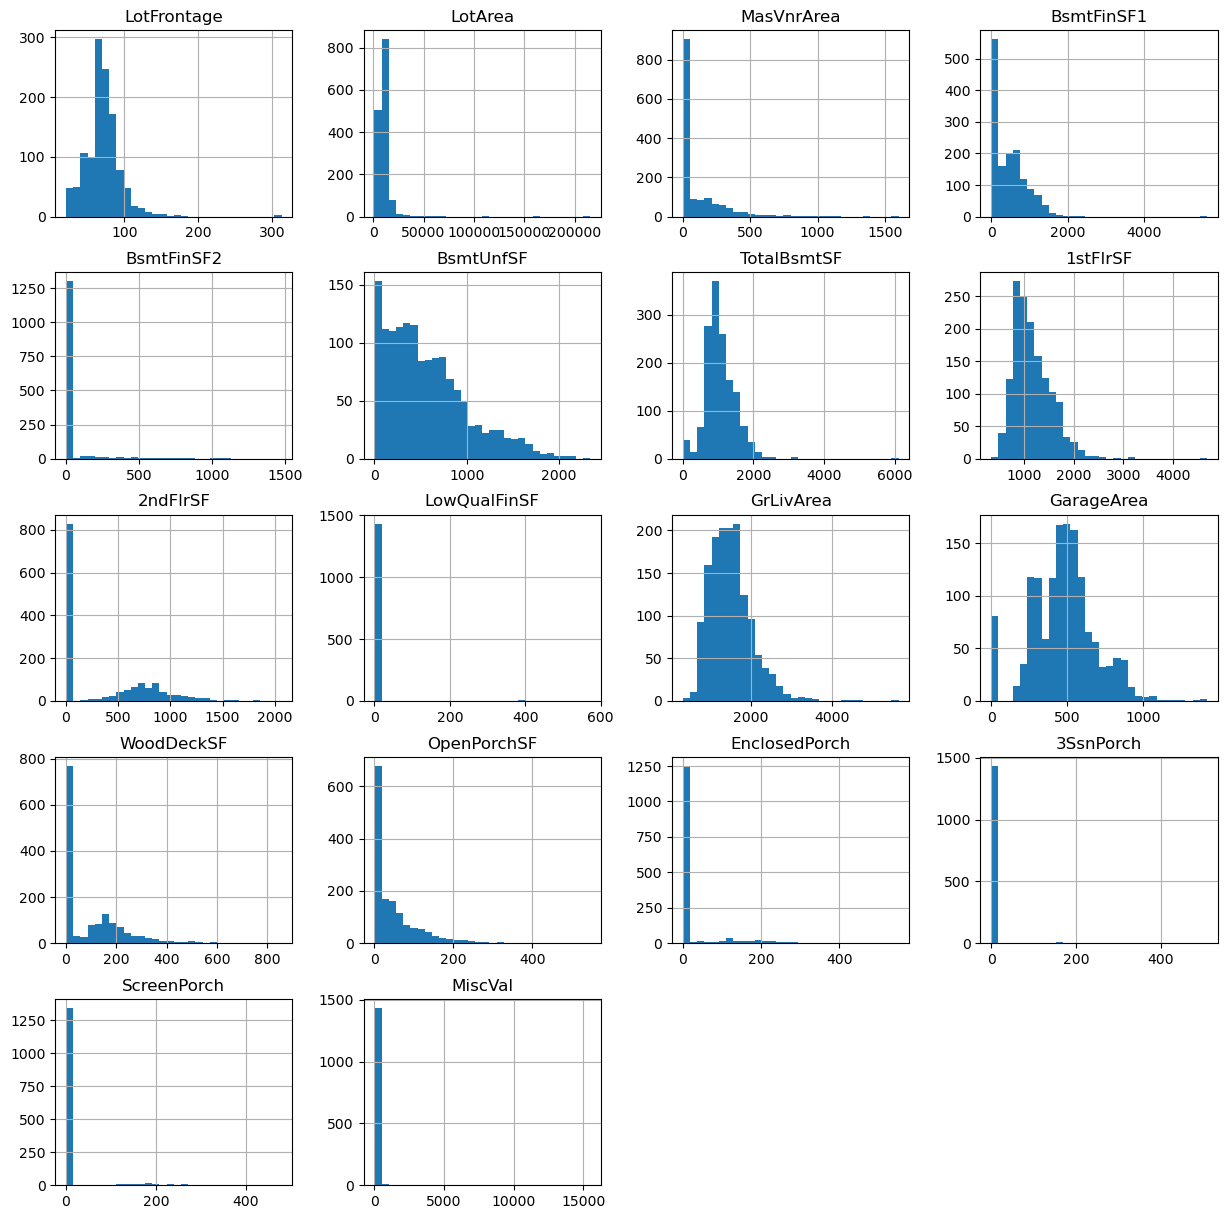

In [30]:
# Let's plot the distribution

data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [35]:
# From visual inspection, make a list of super skewed variables

skewed = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'MiscVal']

# Capture Remaining Continuous Variables

cont_vars = ['LotFrontage',
             'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

# Yeo-Johnson Transformation

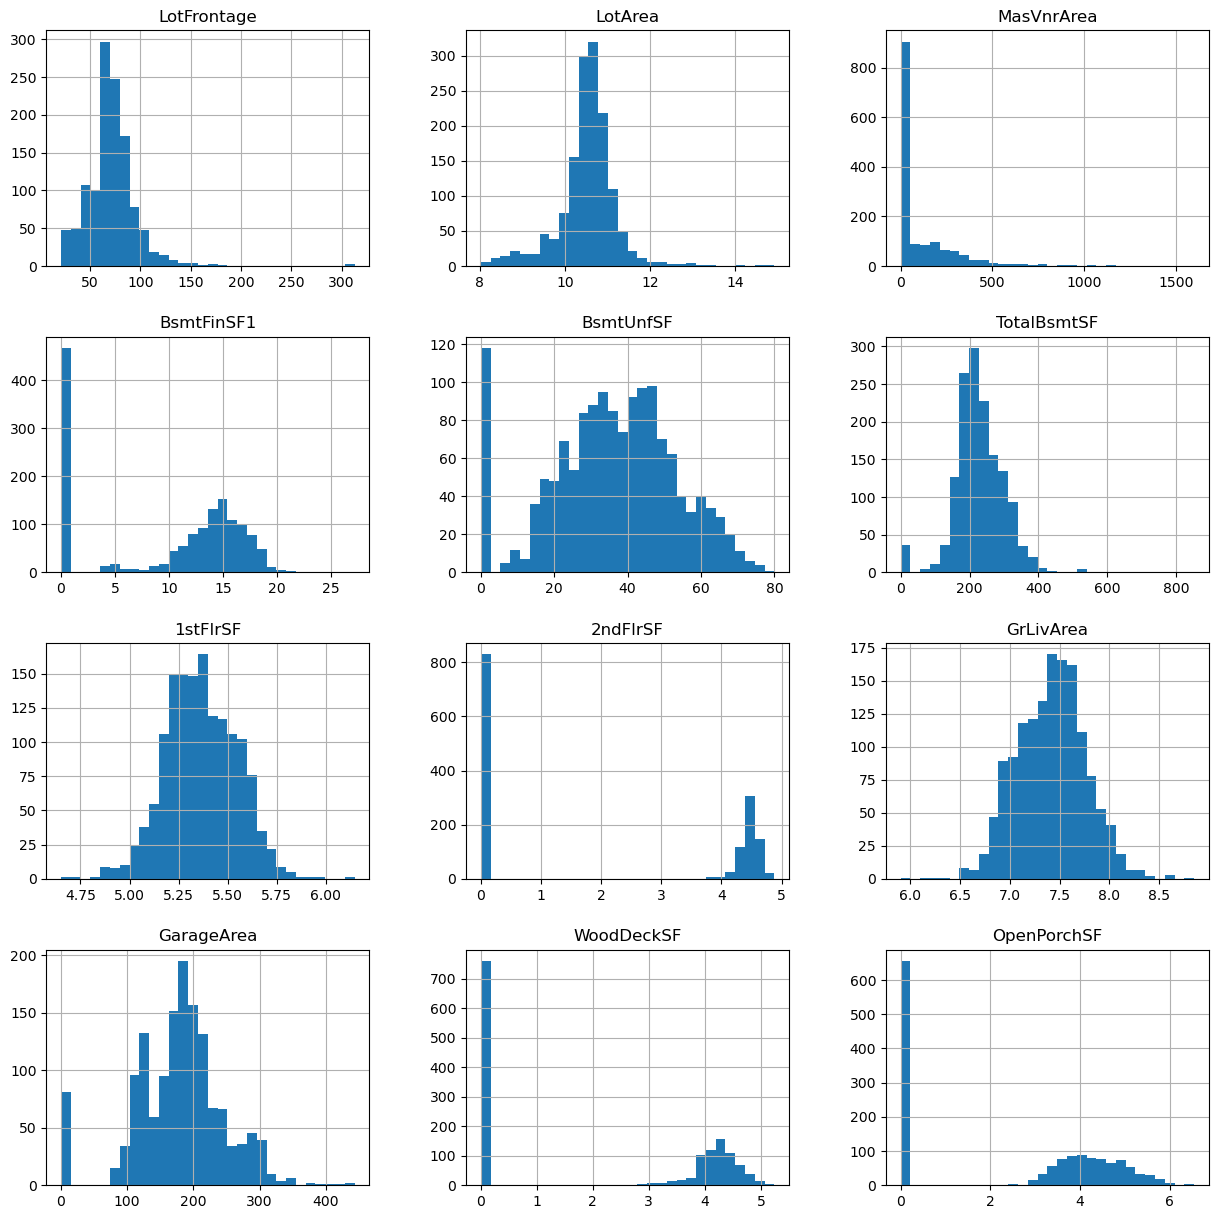

In [43]:
# Let's apply the transformation to continuous variables

# Temporary copy of the data
tmp = data.copy()

for var in cont_vars:
    if (data[var] >= 0).all():  # Ensure no negative values
        tmp[var], param = stats.yeojohnson(data[var])

# plot the histograms to see the effect of the transformation
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

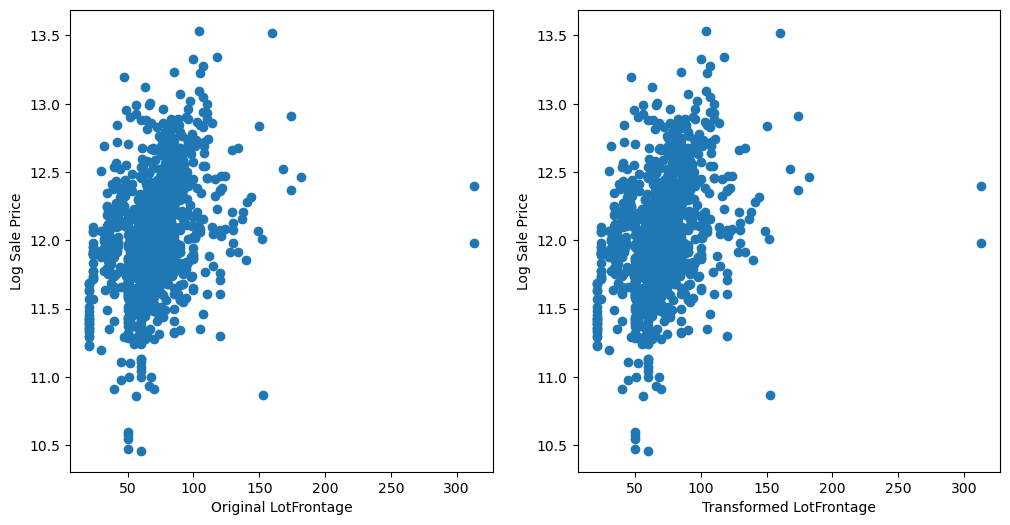

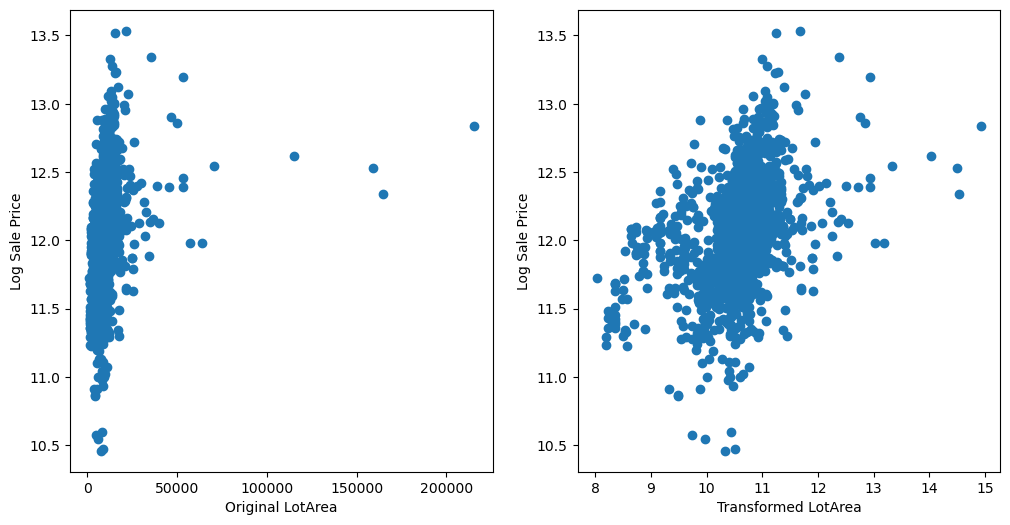

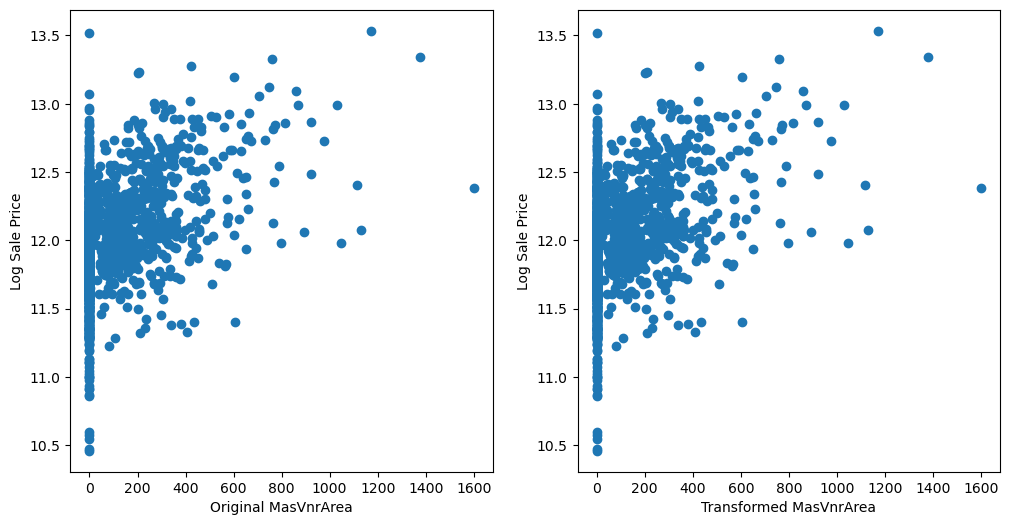

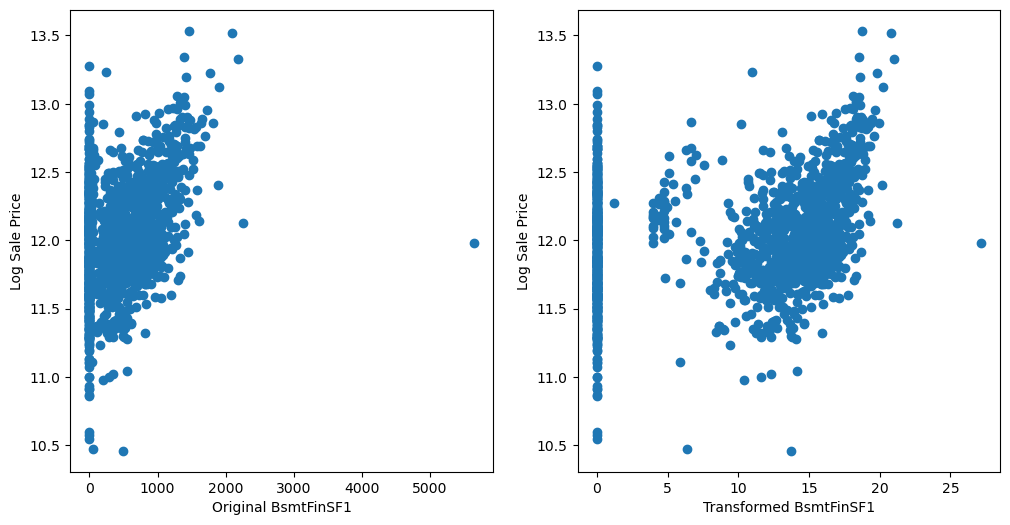

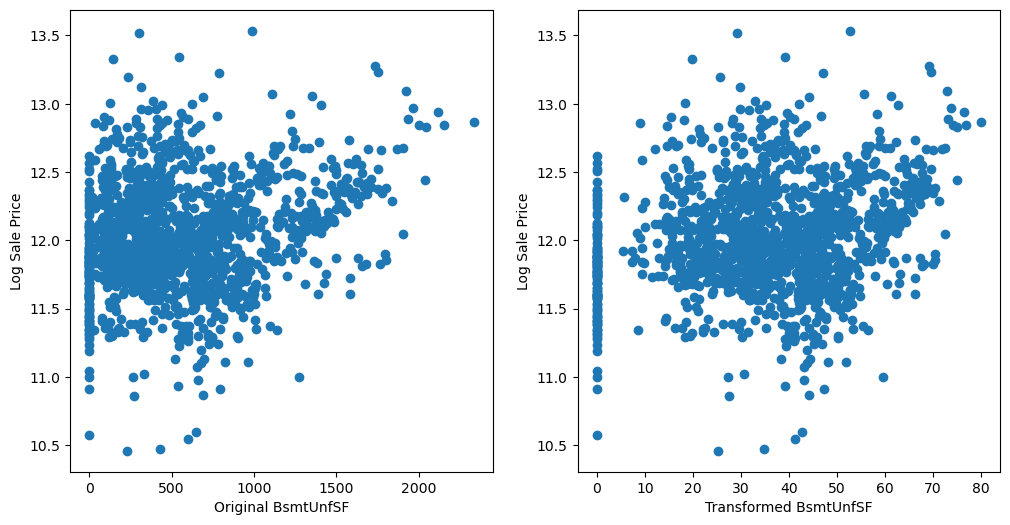

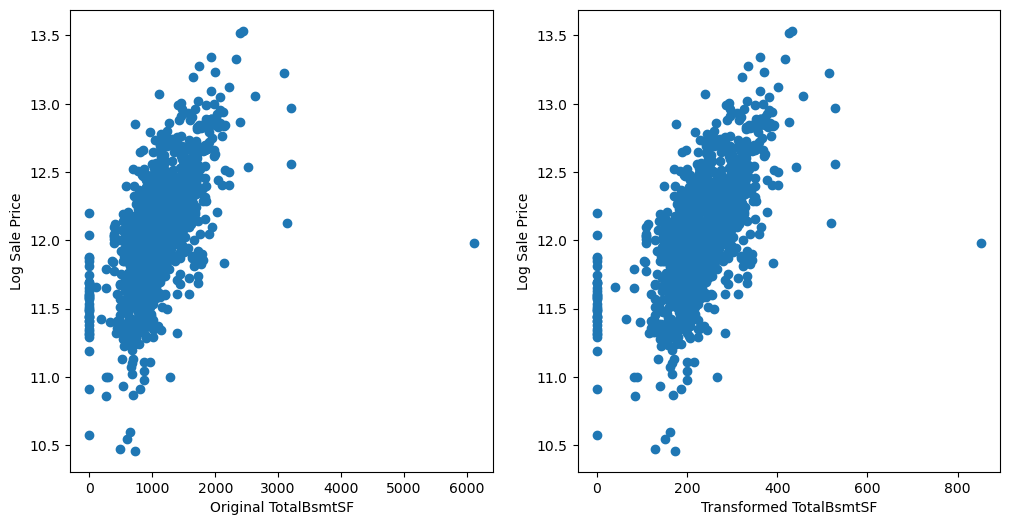

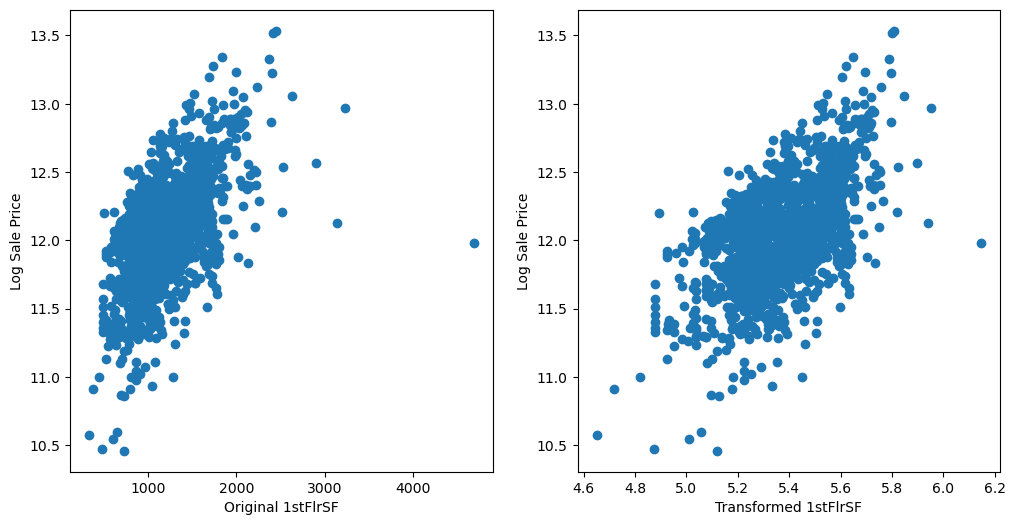

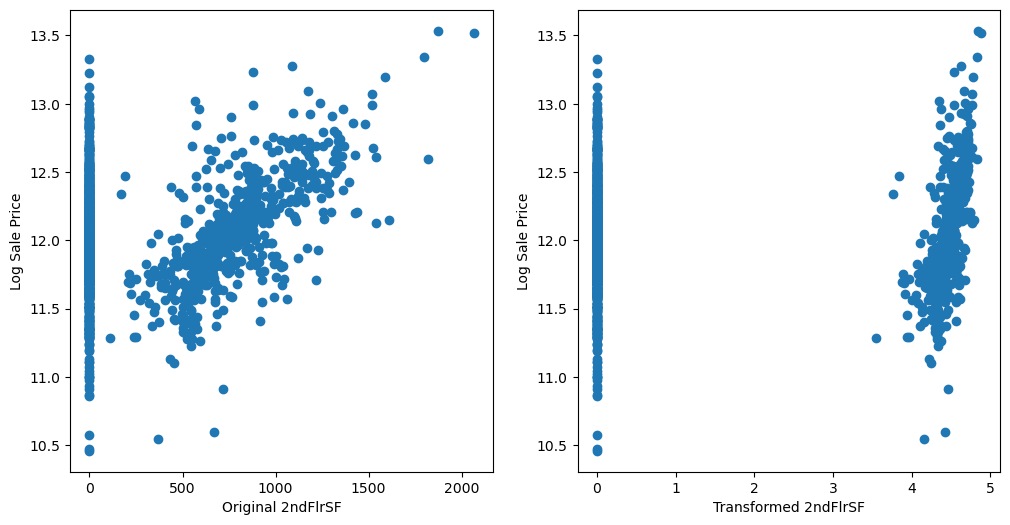

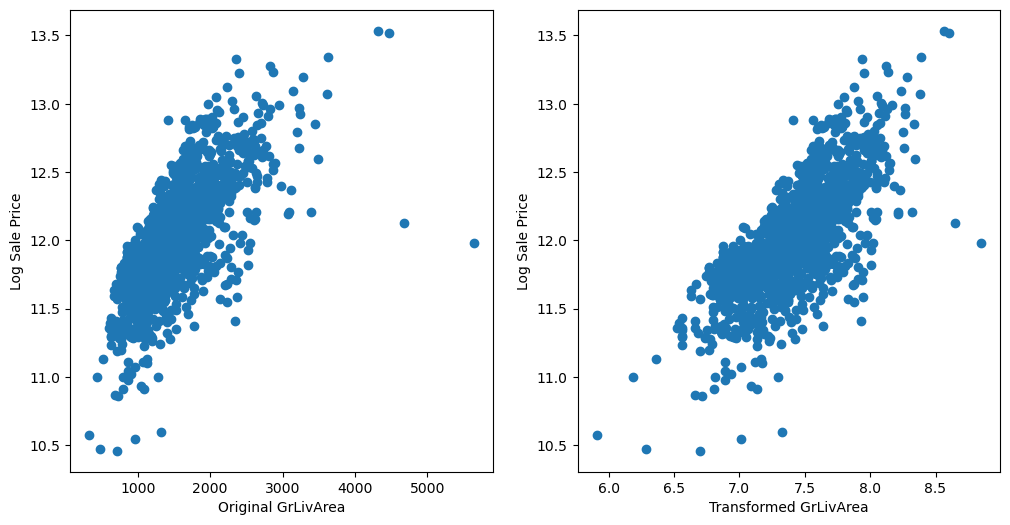

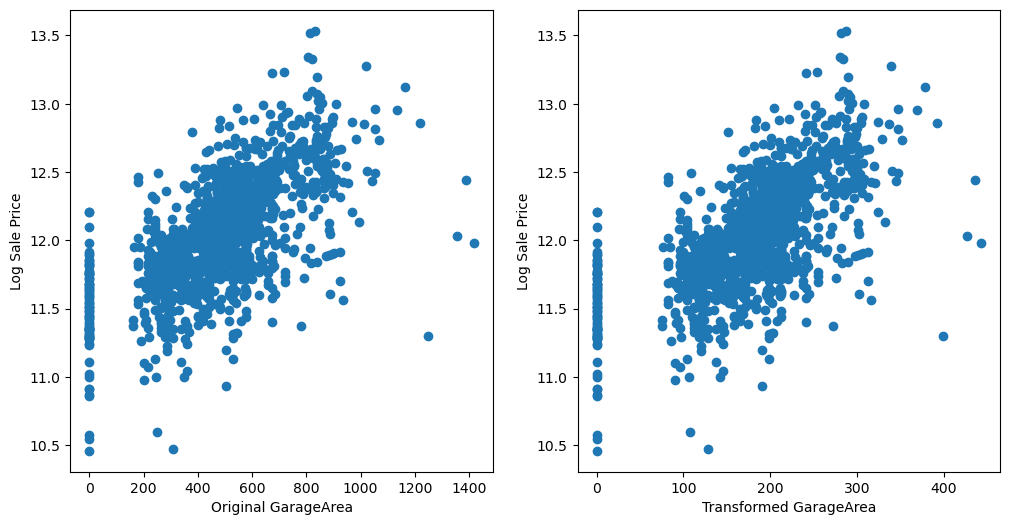

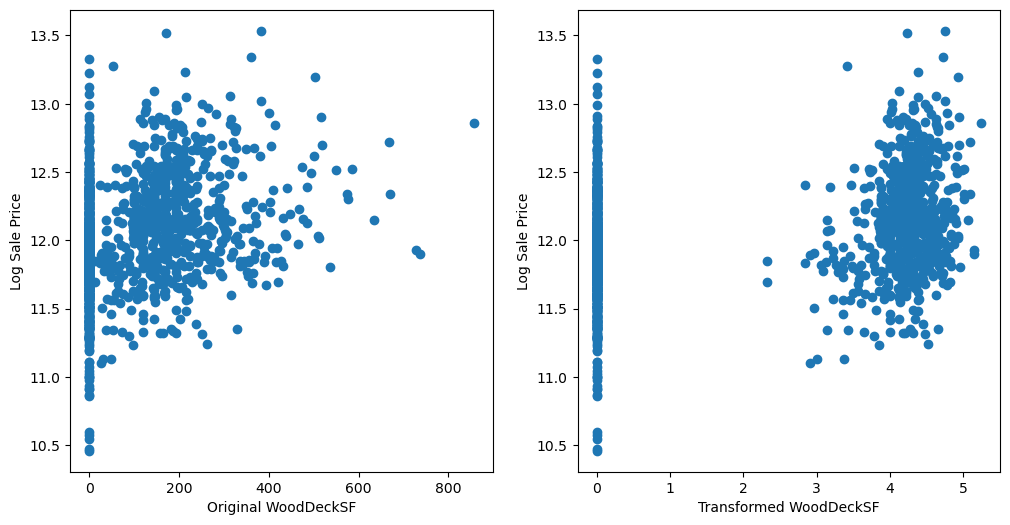

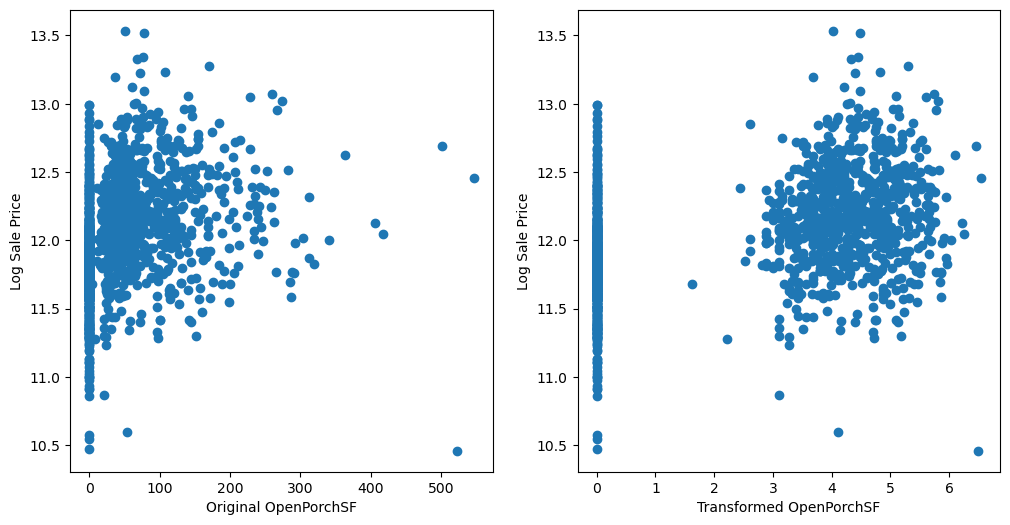

In [44]:
# Lets plot the sales price with original and transformed variables

for var in cont_vars:

    plt.figure(figsize=(12,6))

    #Plot Original Variable vs Sales Price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Log Sale Price')
    plt.xlabel('Original ' + var)

    #Plot transformed variable vs Sales Price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Log Sale Price')
    plt.xlabel('Transformed ' + var)

    plt.show()


# Logarithmic transformation

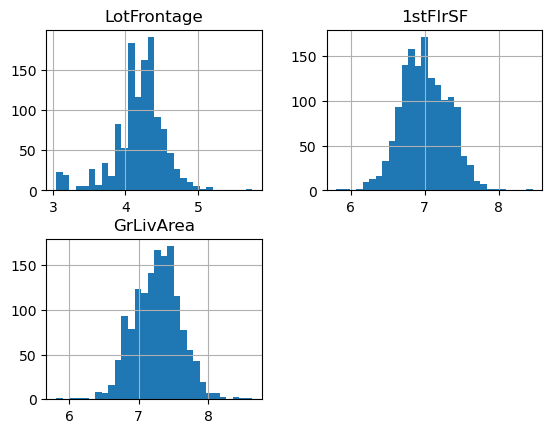

In [45]:
# Apply log transformation to certain variables

tmp = data.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    tmp[var] = np.log(tmp[var])

tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

Distribution looks more gaussian after transformation. Let's evaluate relationship with target

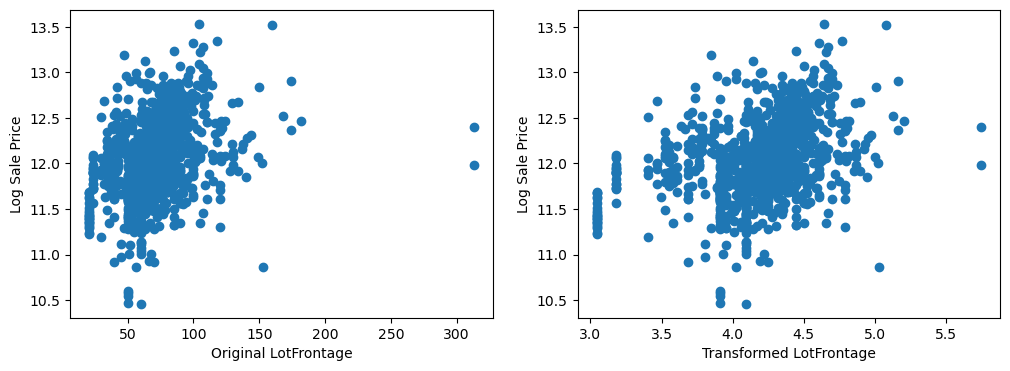

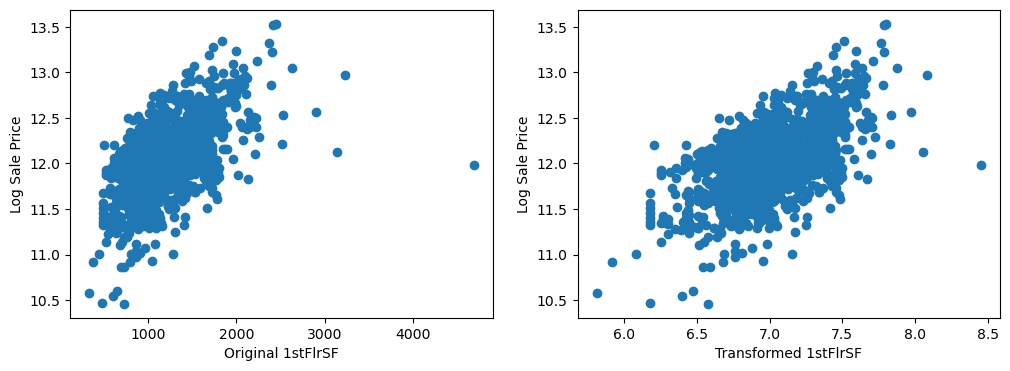

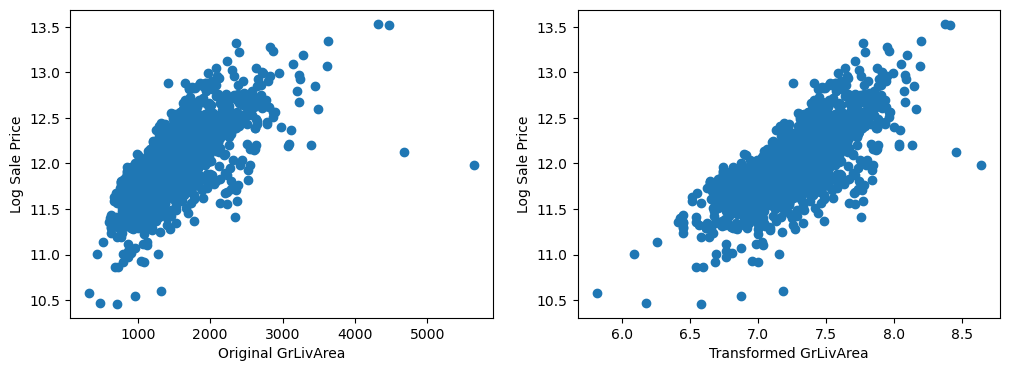

In [46]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    plt.figure(figsize=(12,4))

    #Plot Original Variable vs Sales Price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Log Sale Price')
    plt.xlabel('Original ' + var)

    #Plot transformed variable vs Sales Price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Log Sale Price')
    plt.xlabel('Transformed ' + var)

    plt.show()

Transformation has better spread, which might help us make better predictions

# Skewed Variables

Lets transform them into binary variables and check for predictivity

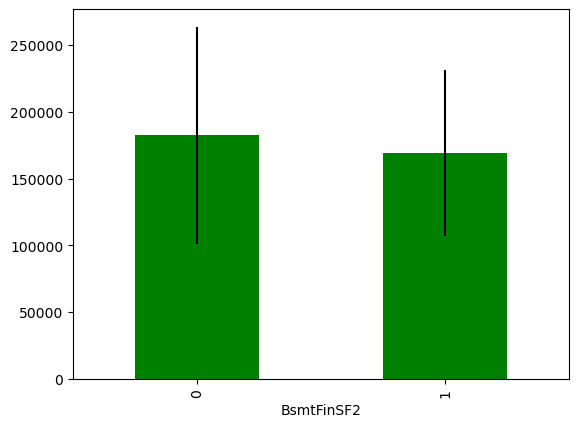

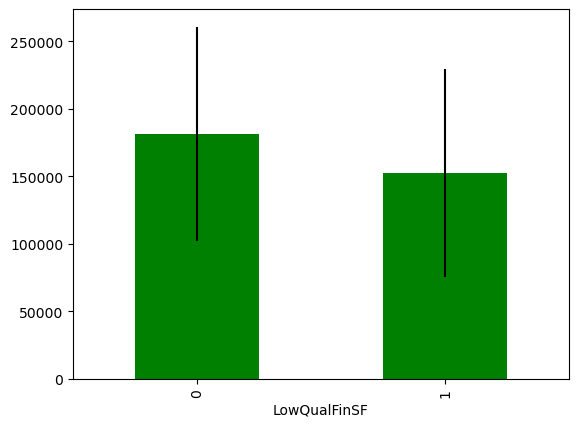

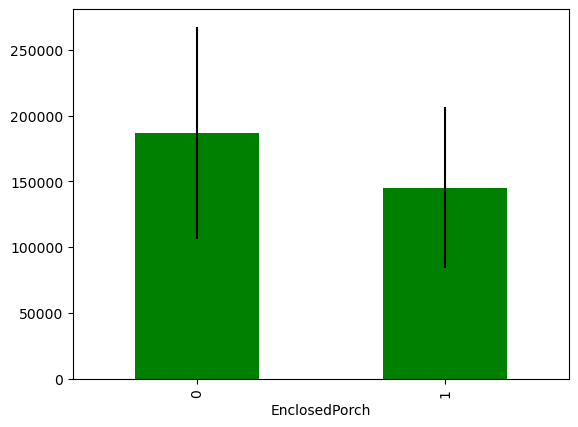

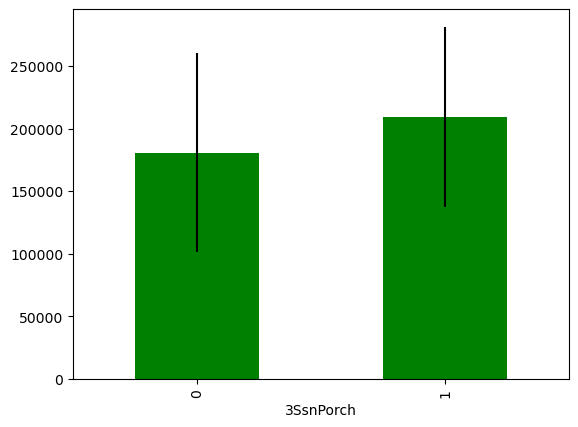

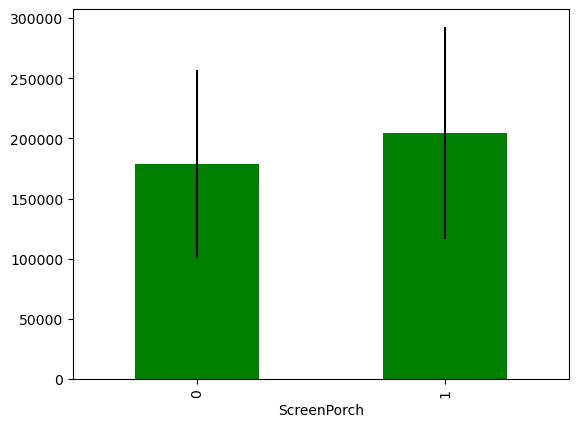

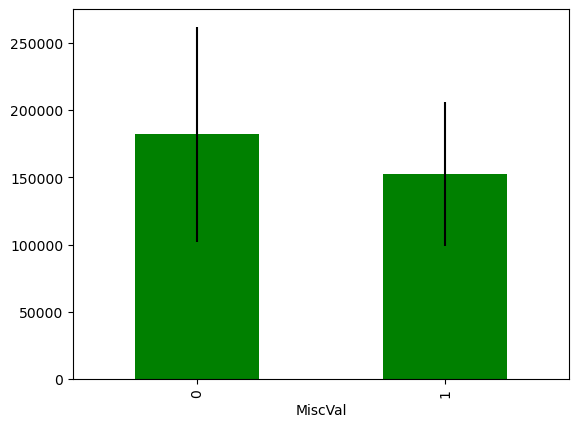

In [47]:
for var in skewed:

    tmp = data.copy()

    #Map variable into 0 and 1
    tmp[var] = np.where(tmp[var]==0, 0, 1)

    #Determin mean sale price in mapped values

    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    #Plot into bar
    tmp.plot(kind='bar', y='mean', legend=False, yerr='std', color='green')